<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW7/Kaggle_data_scaling_and_clustering_Bieber_dsps25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS 461 - Homework 7 - Jarrod Bieber

---


In [71]:
import json
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Task 1

> make a kaggle account and set up your API



In [16]:
# this mounts your google drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# this gets you to your drive folder
%cd gdrive/My\ Drive/

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/gdrive/My Drive


In [18]:
# this makes sure the file is there: this cell should return "kaggle.json"
!ls kaggle.json

kaggle.json


In [19]:
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json

In [20]:
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

## Task 2

> read in the data for the World Happniess Dataset https://www.kaggle.com/datasets/unsdsn/world-happiness/data - use the 2024 data



In [43]:
# We do this import after setting up kaggle
import kaggle

In [38]:
#kaggle.api.dataset_list(search="world happiness")

In [49]:
# use the kaggle.api.dataset_download_files function to download a specific file from a Kaggle dataset in Jupyter Notebook:
#kaggle.api.dataset_download_files("unsdsn/world-happiness", path="./", unzip=True, quiet=False)
kaggle.api.dataset_download_files("mathurinache/world-happiness-report", path="./", unzip=True, quiet=False)

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report


100%|██████████| 67.4k/67.4k [00:00<00:00, 5.30MB/s]

In [59]:
# reading the cvs file
#happiness = pd.read_csv("2019.csv")
happiness = pd.read_csv("2021.csv")

# displaying the 6 raws of contents of the cvs file
happiness.head(6)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580


In [60]:
happiness.shape

(149, 20)

In [61]:
happiness = happiness[['Country name','Ladder score','Standard error of ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption','Dystopia + residual']]
happiness.head()

,Country name,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,Denmark,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,Switzerland,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,Iceland,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,Netherlands,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [62]:
happiness.shape

(149, 10)

In [63]:
happiness.describe()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,0.022001,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,0.026000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,0.043000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,0.054000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,0.070000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,0.173000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


## Task 3

> For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)



In [64]:
# Define min-max scaling function
def min_max_scale(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

# Define standardization function
def standardize(data):
    mean_val = data.mean()
    std_val = data.std()
    return (data - mean_val) / std_val

In [65]:
# Select only the numerical columns
numerical_cols = happiness.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame to store the scaled columns
scaled_happiness = pd.DataFrame()

# Iterate through numerical columns and apply scaling
for col in numerical_cols:

    # Apply Min-Max scaling
    scaled_happiness[f'{col}_minmax'] = min_max_scale(happiness[col])

    # Apply Standardization
    scaled_happiness[f'{col}_standardized'] = standardize(happiness[col])

# Display the new DataFrame
display(scaled_happiness.head())

,Ladder score_minmax,Ladder score_standardized,Standard error of ladder score_minmax,Standard error of ladder score_standardized,Logged GDP per capita_minmax,Logged GDP per capita_standardized,Social support_minmax,Social support_standardized,Healthy life expectancy_minmax,Healthy life expectancy_standardized,Freedom to make life choices_minmax,Freedom to make life choices_standardized,Generosity_minmax,Generosity_standardized,Perceptions of corruption_minmax,Perceptions of corruption_standardized,Dystopia + residual_minmax,Dystopia + residual_standardized
0,1.000000,2.150210,0.040816,-1.215919,0.826018,1.158977,0.944231,1.212083,0.826058,1.036255,0.964286,1.388866,0.228916,-0.550030,0.121354,-3.021039,0.919195,1.530138
1,0.958263,1.943491,0.061224,-1.079563,0.857542,1.295348,0.944231,1.212083,0.850641,1.139774,0.959184,1.362395,0.383133,0.299583,0.113186,-3.060096,0.783345,0.814052
2,0.949051,1.897864,0.068027,-1.034111,0.894254,1.454160,0.921154,1.107634,0.910342,1.391177,0.913265,1.124157,0.377108,0.266395,0.245041,-2.429608,0.773112,0.760113
3,0.945854,1.882034,0.224490,0.011287,0.846568,1.247877,1.000000,1.464500,0.861176,1.184139,0.974490,1.441808,0.539759,1.162472,0.689615,-0.303804,0.818278,0.998188
4,0.928934,1.798230,0.006803,-1.443179,0.857342,1.294485,0.921154,1.107634,0.840105,1.095409,0.903061,1.071215,0.557831,1.262036,0.298716,-2.172949,0.758645,0.683855


In [66]:
scaled_happiness.describe()

,Ladder score_minmax,Ladder score_standardized,Standard error of ladder score_minmax,Standard error of ladder score_standardized,Logged GDP per capita_minmax,Logged GDP per capita_standardized,Social support_minmax,Social support_standardized,Healthy life expectancy_minmax,Healthy life expectancy_standardized,Freedom to make life choices_minmax,Freedom to make life choices_standardized,Generosity_minmax,Generosity_standardized,Perceptions of corruption_minmax,Perceptions of corruption_standardized,Dystopia + residual_minmax,Dystopia + residual_standardized
count,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02,149.000000,1.490000e+02
mean,0.565866,-3.338120e-16,0.222801,6.914678e-16,0.558102,-1.001436e-15,0.676433,9.060612e-16,0.579975,1.335248e-15,0.696594,-6.199366e-16,0.328754,-2.980464e-17,0.753150,-5.484055e-16,0.628909,-7.391552e-16
std,0.201903,1.000000e+00,0.149668,1.000000e+00,0.231165,1.000000e+00,0.220940,1.000000e+00,0.237473,1.000000e+00,0.192741,1.000000e+00,0.181514,1.000000e+00,0.209132,1.000000e+00,0.189712,1.000000e+00
min,0.000000,-2.802657e+00,0.000000,-1.488631e+00,0.000000,-2.414297e+00,0.000000,-3.061606e+00,0.000000,-2.442279e+00,0.000000,-3.614143e+00,0.000000,-1.811176e+00,0.000000,-3.601311e+00,0.000000,-3.315065e+00
25%,0.437864,-6.339734e-01,0.115646,-7.159463e-01,0.380287,-7.692102e-01,0.551923,-5.635435e-01,0.397682,-7.676376e-01,0.571429,-6.493969e-01,0.195181,-7.358834e-01,0.682614,-3.372812e-01,0.525759,-5.437208e-01
50%,0.566084,1.081151e-03,0.190476,-2.159736e-01,0.585395,1.180664e-01,0.709615,1.501887e-01,0.636523,2.381235e-01,0.717687,1.094369e-01,0.303614,-1.384988e-01,0.815636,2.987861e-01,0.656669,1.463254e-01
75%,0.701636,6.724511e-01,0.299320,5.112595e-01,0.755387,8.534358e-01,0.850000,7.855845e-01,0.741773,6.813327e-01,0.841837,7.535634e-01,0.442169,6.248260e-01,0.890315,6.558765e-01,0.757234,6.764147e-01
max,1.000000,2.150210e+00,1.000000,5.192822e+00,1.000000,1.911608e+00,1.000000,1.464500e+00,1.000000,1.768726e+00,1.000000,1.574163e+00,1.000000,3.698038e+00,1.000000,1.180353e+00,1.000000,1.956069e+00


## Task 4

> For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized



## Task 5

> Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters



In [70]:
# Select the min-max scaled features for clustering
scaled_features = scaled_happiness[[
    'Social support_minmax',
    'Healthy life expectancy_minmax',
    'Freedom to make life choices_minmax',
    'Perceptions of corruption_minmax',
    'Generosity_minmax',
    'Dystopia + residual_minmax'
]]

# Initialize and fit KMeans
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=42, n_init=10)
happiness['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the new cluster column
display(happiness.head())

,Country name,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Cluster
0,Finland,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,2
1,Denmark,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868,2
2,Switzerland,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839,2
3,Iceland,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967,2
4,Netherlands,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798,2


## Task 6

> Make a scatter plot with the cluster (0, 1, or 2) on the X axis, and the Happiness score *with its errorbar* on the Y axis and, as usual, comment on the figure your *what, how, wow*



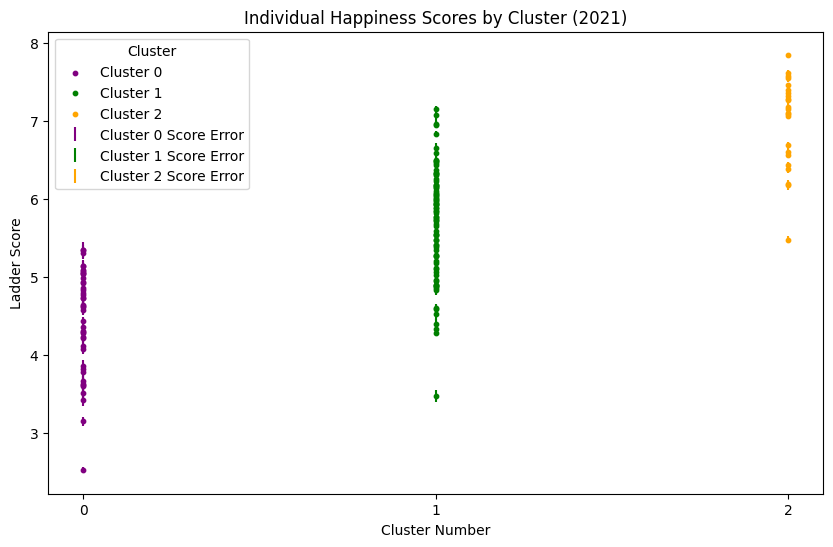

In [96]:
# Create the scatter plot of individual happiness scores by cluster
plt.figure(figsize=(10, 6))

# Define colors for each cluster
colors = {0: 'purple', 1: 'green', 2: 'orange'} # Use a dictionary for mapping cluster to color

# Plot each cluster separately
for cluster_label in sorted(happiness['Cluster'].unique()):
    cluster_data = happiness[happiness['Cluster'] == cluster_label]
    plt.scatter(
        x=cluster_data['Cluster'],
        y=cluster_data['Ladder score'],
        color=colors[cluster_label],
        label=f'Cluster {cluster_label}',
        s=10
    )
    plt.errorbar(
        x=cluster_data['Cluster'],
        y=cluster_data['Ladder score'],
        yerr=cluster_data['Standard error of ladder score'],
        fmt='none',
        color=colors[cluster_label],
        label=f'Cluster {cluster_label} Score Error'
    )

# Set labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Ladder Score')
plt.title('Individual Happiness Scores by Cluster (2021)')
plt.xticks(sorted(happiness['Cluster'].unique())) # Only show values 0,1,2 on the X axis
plt.legend(title='Cluster')

plt.show()

Figure 123: A scatter plot of the ladder score, AKA the happiness score for each country, along with their error bars, sorted into clusters. The happiness data is derived from a dataset by the user Mathurin Aché on Kaggle.com. KMeans clustering was used to sort each country into one of three clusters, based on the their respective scaled (min-max) numerical features: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', and 'Dystopia Residual'. Error bars were applied to each data point based on the ladder score standard error inlcuded in the original dataset. The three color-coded clusters are specified in the legend, as are the error bars. The plot suggests that the countries in Cluster 2 are happier than those in Cluster 1, which are likewise happier than those in Cluster 0. A heirarchy of happiness groups is established. However, there is significant overlap between the groups in terms of the ladder score, which indicates that the 3-cluster KMeans routine did not do a particularly good job. It is also noteworthy that the individual errors for each country are apparently quite tiny compared to the overall spread of happiness scores amongst all countries, which suggests that the methodology for calculating the happiness score is quite accurate.

## Task 7

> extra credit for 461, required for 661: repeat for 2, 3, 4, 5 , 6, 7 and make a plot of KMeans intracluster variance vs the number of clusters (respectively Y and X) and discuss if this plots allows for a robust selection of the correct number of clusters

